In [1]:
#Import packages
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn

In [3]:
#Import data into program
death_rate = pd.read_csv("CovidDeathRate.csv")
death_rate.shape

(176, 11)

In [4]:
death_rate['Tiers'].value_counts()

mid     114
low      40
high     22
Name: Tiers, dtype: int64

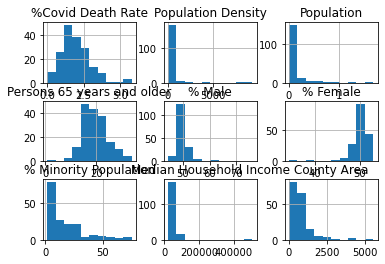

In [5]:
death_rate.hist()
pyplot.show()

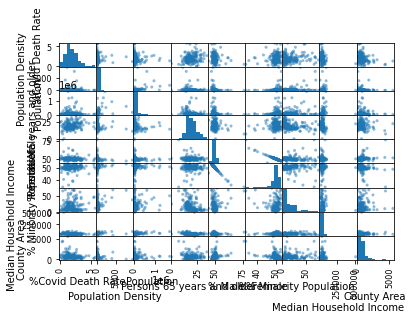

In [8]:
scatter_matrix(death_rate)
pyplot.show()

In [9]:
y = death_rate.pop('Tiers')
death_rate.pop('County Name')
death_rate.pop('%Covid Death Rate')

0      0.00
1      0.00
2      0.24
3      0.25
4      0.31
       ... 
171    4.29
172    4.74
173    5.52
174    5.59
175    5.77
Name: %Covid Death Rate, Length: 176, dtype: float64

In [10]:
y

0       low
1       low
2       low
3       low
4       low
       ... 
171    high
172    high
173    high
174    high
175    high
Name: Tiers, Length: 176, dtype: object

In [11]:
y.unique()

array(['low', 'mid', 'high'], dtype=object)

In [13]:
x = death_rate.copy()

In [14]:
x

,Population Density,Population,Persons 65 years and older,% Male,% Female,% Minority Population,Median Household Income,County Area
0,0.9,745.0,24.0,48.5,51.5,2.4,51750.0,746.11
1,1.0,117.0,24.4,51.1,48.9,5.6,39688.0,1079.00
2,25.8,14105.0,18.9,54.0,46.0,17.3,38568.0,574.00
3,27.3,7109.0,25.6,50.1,49.9,2.0,38382.0,281.00
4,96.7,128289.0,9.8,50.0,50.0,7.1,59038.0,1173.00
...,...,...,...,...,...,...,...,...
171,4.3,3509.0,24.1,48.6,51.4,7.0,40739.0,867.48
172,9.9,8209.0,22.7,55.1,44.9,27.3,46065.0,898.26
173,70.5,17634.0,17.9,47.2,52.8,45.2,32229.0,250.12
174,10.1,3038.0,23.7,49.2,50.8,47.1,32917.0,341.94


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 8), (36, 8), (140,), (36,))

In [16]:
x_train

,Population Density,Population,Persons 65 years and older,% Male,% Female,% Minority Population,Median Household Income,County Area
97,24.5,21859.0,14.7,53.5,46.5,25.0,50721.0,901.81
44,64.1,39752.0,27.5,44.4,45.6,10.4,62772.0,594.58
142,290.2,240204.0,17.7,47.3,52.7,53.5,41797.0,2430.00
115,48.6,16441.0,20.7,48.9,51.1,3.5,38456.0,341.06
5,8.5,38880.0,12.2,51.8,48.2,9.7,49322.0,4273.84
...,...,...,...,...,...,...,...,...
61,135.0,1180811.0,23.8,50.0,50.0,5.1,62965.0,825.23
169,35.7,13145.0,20.1,49.3,50.7,23.5,57946.0,355.27
168,13.5,7152.0,23.0,49.8,50.2,2.6,53363.0,569.27
123,33.4,7888.0,21.9,49.7,50.3,6.8,45048.0,246.66


In [17]:
x_test

,Population Density,Population,Persons 65 years and older,% Male,% Female,% Minority Population,Median Household Income,County Area
46,12.0,9298.0,22.80,51.4,48.6,15.4,47556.0,776.62
13,8.5,5189.0,0.67,50.5,49.5,24.4,46417.0,632.00
11,48.1,29993.0,22.10,49.9,50.1,3.9,505663.0,658.00
26,230.2,108277.0,18.20,49.0,51.0,8.3,53509.0,467.93
17,196.1,10867.0,16.70,48.6,51.4,29.4,64572.0,1.59
160,63.3,13094.0,19.00,48.6,51.4,23.4,48207.0,203.00
84,22.1,9020.0,20.10,50.8,49.2,4.0,49839.0,430.00
55,1379.4,36820.0,15.00,47.5,52.5,17.0,59029.0,22.40
121,79.3,19234.0,17.70,50.8,49.2,6.2,47811.0,232.09
29,782.1,356921.0,14.50,50.0,50.0,16.2,82175.0,423.10


In [18]:
y_train

97      mid
44      mid
142     mid
115     mid
5       low
       ... 
61      mid
169    high
168    high
123     mid
136     mid
Name: Tiers, Length: 140, dtype: object

In [19]:
y_test

46      mid
13      low
11      low
26      low
17      low
160    high
84      mid
55      mid
121     mid
29      low
69      mid
135     mid
155    high
71      mid
107     mid
15      low
119     mid
95      mid
27      low
33      low
86      mid
77      mid
125     mid
100     mid
137     mid
57      mid
32      low
163    high
72      mid
23      low
66      mid
152     mid
4       low
149     mid
170    high
78      mid
Name: Tiers, dtype: object

In [20]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions

array(['mid', 'mid', 'mid', 'mid', 'mid', 'mid', 'mid', 'mid', 'mid',
       'mid', 'mid', 'low', 'mid', 'mid', 'mid', 'mid', 'mid', 'mid',
       'mid', 'low', 'mid', 'mid', 'mid', 'mid', 'mid', 'mid', 'mid',
       'mid', 'mid', 'mid', 'mid', 'mid', 'low', 'mid', 'mid', 'mid'],
      dtype=object)

In [23]:
accuracy_score(y_test, predictions)

0.6111111111111112

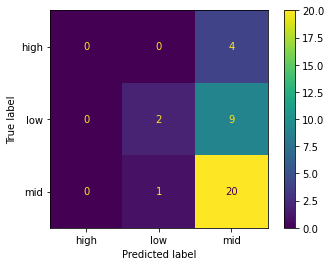

In [24]:
sklearn.metrics.plot_confusion_matrix(model, x_test, y_test)

In [25]:
# Sample Values
PopulationDensity = 2
Population = 50
Persons65yearsolder = 20
Male = 50
Female = 50
MinorityPopulation = 50
MedianHousehold = 50
CountyArea = 50

In [26]:
inputs = np.array([PopulationDensity,Population,Persons65yearsolder,Male,Female, MinorityPopulation,MedianHousehold,CountyArea]).reshape(1,-1)
print('Predicted species is: ' + model.predict(inputs)[0])

Predicted species is: high


In [27]:
print('Probability it is low: ' + str(model.predict_proba(inputs)[0][0]))
print('Probability it is mid: ' + str(model.predict_proba(inputs)[0][1]))
print('Probability it is high: ' + str(model.predict_proba(inputs)[0][2]))

Probability it is low: 0.36
Probability it is mid: 0.31
Probability it is high: 0.33


In [28]:
feature_importance = pd.DataFrame({'Feature' : x_train.columns, 'Importance' : model.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)

In [29]:
feature_importance

,Feature,Importance
1,Population,0.149883
6,Median Household Income,0.140879
0,Population Density,0.137002
2,Persons 65 years and older,0.133298
7,County Area,0.132373
5,% Minority Population,0.125280
3,% Male,0.092380
4,% Female,0.088903
